In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from functions import select_random_rows

In [3]:
# read data
anom = np.load('anomaly_samples.npy',allow_pickle=True).astype(np.float64)
norm = np.load('normal_samples.npy',allow_pickle = True).astype(np.float64)

In [4]:
norm_no = 40000
sel_from_norm = select_random_rows(norm,norm_no)

In [5]:
all_samples = np.concatenate((sel_from_norm,anom),axis = 0)

zero_labels = np.zeros(sel_from_norm.shape[0])
one_labels = np.ones(anom.shape[0])

# zero_labels = np.zeros(anom.shape[0])
# one_labels = np.ones(sel_from_norm.shape[0])


all_labels = np.concatenate((zero_labels,one_labels))
all_samps_labs = np.column_stack((all_samples,all_labels)) # [data|label]

In [6]:
all_samps_labs

array([[-1.6000e-02,  8.1460e+00,  8.1380e+00, ...,  5.3425e+01,
         4.0000e-02,  0.0000e+00],
       [-1.2000e-02,  9.5700e+00,  9.5580e+00, ...,  6.6400e+01,
         3.9550e+00,  0.0000e+00],
       [-1.2000e-02,  8.4060e+00,  8.3940e+00, ...,  6.3700e+01,
         4.2500e-02,  0.0000e+00],
       ...,
       [-4.0000e-03,  8.7840e+00,  8.7700e+00, ...,  7.3500e+01,
         3.6325e+00,  1.0000e+00],
       [-6.0000e-03,  8.7540e+00,  8.7380e+00, ...,  7.3325e+01,
         3.5475e+00,  1.0000e+00],
       [-6.0000e-03,  8.7240e+00,  8.7100e+00, ...,  7.3350e+01,
         4.0000e-02,  1.0000e+00]])

In [7]:
# Shuffling
np.random.shuffle(all_samps_labs)


In [8]:
all_samps_labs[:,7][0:10][0]

0.0

In [9]:
# Extracting X,y
X = all_samps_labs[:,:-1]
y = all_samps_labs[:,-1]

In [10]:
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


In [12]:

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9898041831435513
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12092
         1.0       0.98      0.99      0.99      8897

    accuracy                           0.99     20989
   macro avg       0.99      0.99      0.99     20989
weighted avg       0.99      0.99      0.99     20989



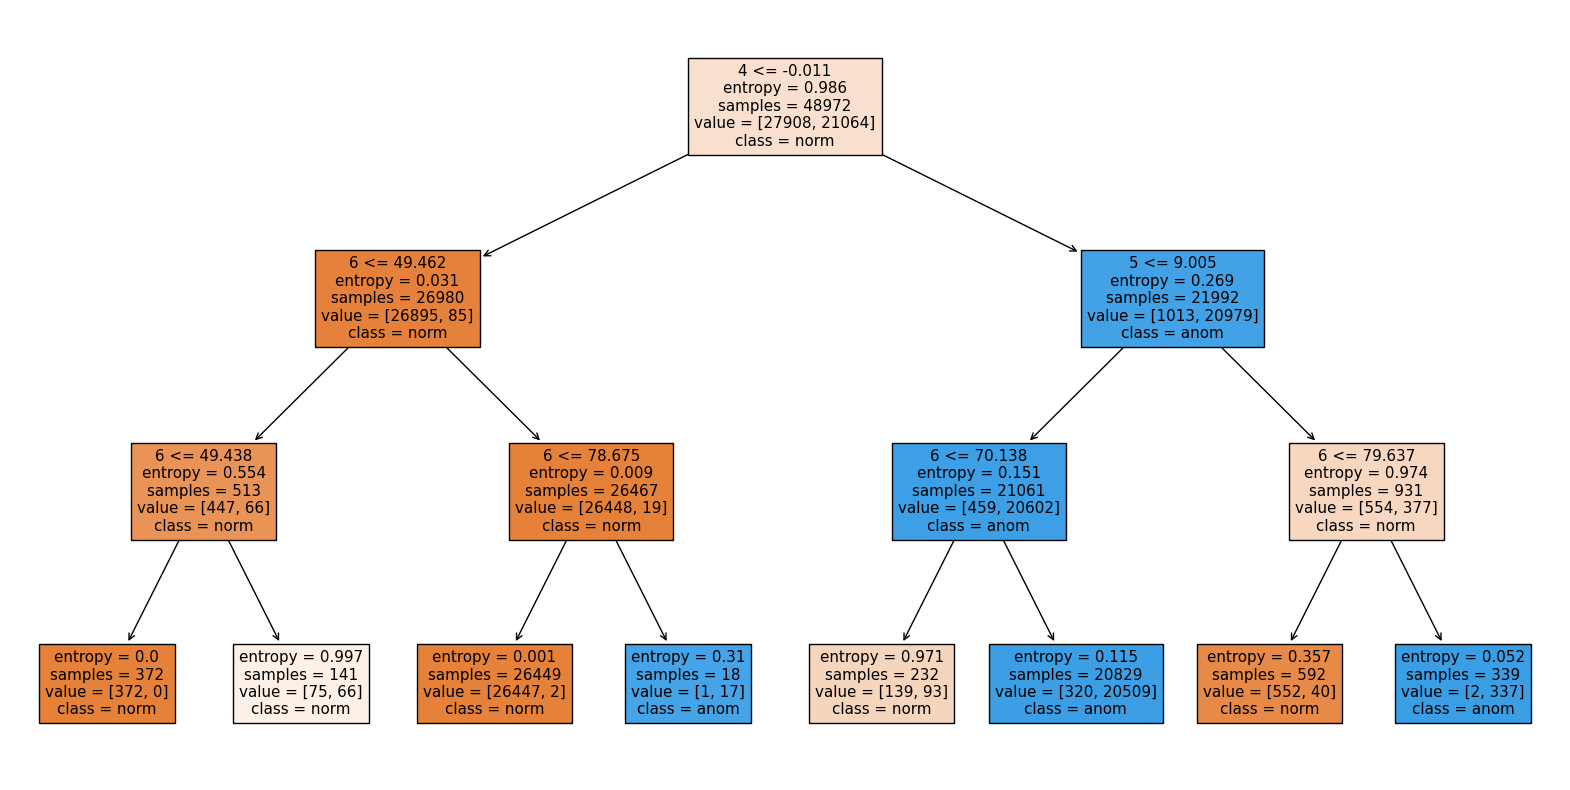

In [13]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=['1','2','3','4','5','6','7'], class_names=['norm','anom'])
plt.show()


In [13]:
print(clf.predict_proba([all_samples[1]]))
print(clf.predict([all_samples[1]]))

[[9.99470959e-01 5.29040547e-04]]
[0.]


In [14]:
# Assuming clf is your trained DecisionTreeClassifier
tree_rules = tree.export_text(clf, feature_names=['1','2','3','4','5','6','7'])
print(tree_rules)

|--- 4 <= -0.01
|   |--- 6 <= 49.46
|   |   |--- class: 0.0
|   |--- 6 >  49.46
|   |   |--- class: 0.0
|--- 4 >  -0.01
|   |--- 5 <= 9.00
|   |   |--- class: 1.0
|   |--- 5 >  9.00
|   |   |--- class: 0.0



In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

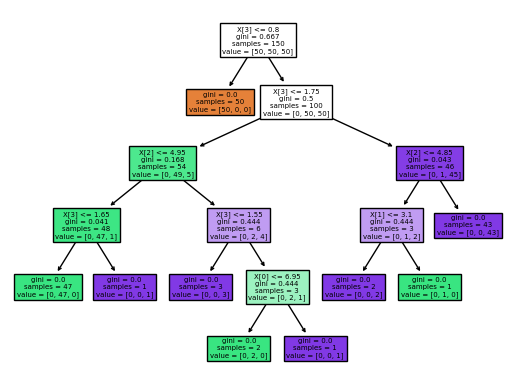

In [120]:
tree.plot_tree(clf,filled=True)
plt.show()

In [15]:
import numpy as np


  """
  Performs Principal Component Analysis (PCA) on a given dataset.

  Args:
      data: A NumPy array of shape (n_samples, n_features) representing the data.
      n_components: (Optional) The number of principal components to return.
          If None, all components are returned. Defaults to None.

  Returns:
      A tuple containing:
          - pcs: A NumPy array of shape (n_features, n_components) representing the principal components.
          - explained_variance: A NumPy array of shape (n_components,) containing the explained variance ratio for each component.
  """

# Center the data by subtracting the mean of each feature
mean = np.mean(data, axis=0)
centered_data = data - mean

# Calculate the covariance matrix
covariance = np.cov(centered_data.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]

# Select the desired number of components (if specified)
if n_components is not None:
pcs = eigenvectors[:, :n_components]  # Select top n_components eigenvectors
explained_variance = eigenvalues[:n_components] / np.sum(eigenvalues)  # Explained variance ratio
else:
pcs = eigenvectors
explained_variance = eigenvalues / np.sum(eigenvalues)

  

# Example usage
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Replace with your actual data
pcs, explained_variance = pca(data, n_components=1)  # Choose the number of components

# Use the principal components (pcs) and explained variance (explained_variance) for further analysis


In [16]:
print(pcs)
print(explained_variance)

[[ 5.77350269e-01  7.44271337e-16 -4.35592526e-01]
 [ 5.77350269e-01 -7.07106781e-01 -3.80279287e-01]
 [ 5.77350269e-01  7.07106781e-01  8.15871813e-01]]
[ 1.00000000e+00  1.59780855e-32 -7.57716749e-18]


In [14]:
unique_index = pd.Index(df['Name'])
unique_index


Index(['Alice', 'Bob', 'Charlie', 'Alice', 'David'], dtype='object', name='Name')

In [17]:
arr1 = np.array([[1, 2, 3],[4,4,4]])
arr2 = np.array([[4, 5, 6],[6,6,6]])

# Append arr2 to the end of arr1 (vertically)
appended_arr = np.append(arr1, arr2, axis=0)
arr1

array([[1, 2, 3],
       [4, 4, 4]])

In [21]:
# Sample NumPy array
arr = np.array([[1.0, 2, 3], [4, 5, 6], [7, 8, 9],[6,6,6],[8,8,8]])

arr[:,:3]

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.],
       [6., 6., 6.],
       [8., 8., 8.]])

In [16]:
# Sample NumPy array (replace with your actual data)
data = np.array([[1, 3, 5], [2, 4, 6], [7, 8, 9]])
print(data)

# Normalize each feature (column)
normalized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(normalized_data)

[[1 3 5]
 [2 4 6]
 [7 8 9]]
[[-0.88900089 -0.9258201  -0.98058068]
 [-0.50800051 -0.46291005 -0.39223227]
 [ 1.3970014   1.38873015  1.37281295]]


In [17]:
data

array([[1, 3, 5],
       [2, 4, 6],
       [7, 8, 9]])

In [18]:
np.mean(data, axis=0)

array([3.33333333, 5.        , 6.66666667])

In [19]:
data-np.mean(data,axis = 0)

array([[-2.33333333, -2.        , -1.66666667],
       [-1.33333333, -1.        , -0.66666667],
       [ 3.66666667,  3.        ,  2.33333333]])

In [20]:
np.std(data, axis=0)

array([2.62466929, 2.1602469 , 1.69967317])

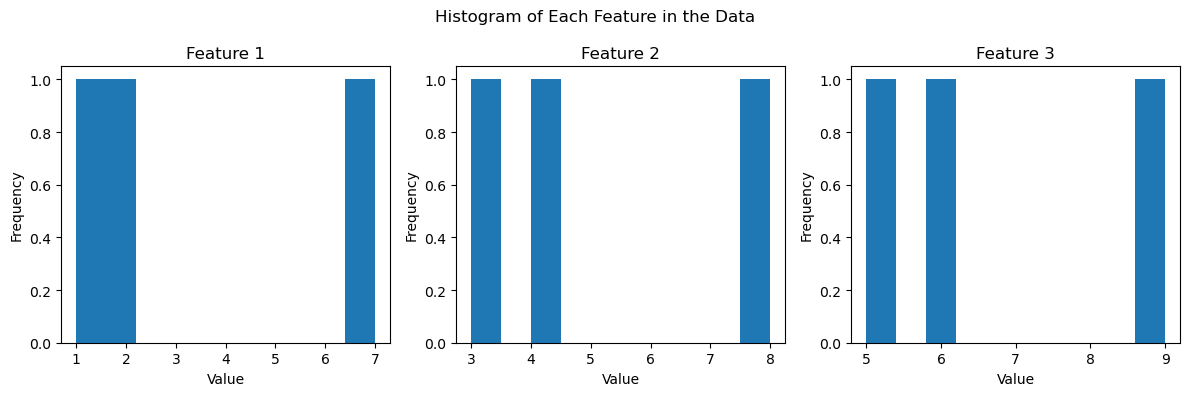

In [21]:
# Histogram
import matplotlib.pyplot as plt
import numpy as np

# Sample NumPy array (replace with your actual data)
data = np.array([[1, 3, 5], [2, 4, 6], [7, 8, 9]])

# Number of features (columns)
num_features = data.shape[1]

# Create a subplot grid for plotting
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(12, 4))

# Plot histogram for each feature (column)
for i in range(num_features):
  axes[i].hist(data[:, i])  # data[:, i] selects the i-th column
  axes[i].set_title(f"Feature {i+1}")  # Customize titles if needed
  axes[i].set_xlabel("Value")
  axes[i].set_ylabel("Frequency")

# Adjust layout and display the plot
fig.suptitle("Histogram of Each Feature in the Data")
plt.tight_layout()
plt.show()

In [1]:
import numpy as np

# Define two matrices
matrix_A = np.array([[1, 2], [3, 4]])
matrix_B = np.array([[5, 6], [7, 8]])

# Perform matrix multiplication (using `np.dot` is less preferred)
result = np.dot(matrix_A, matrix_B)

print(result)


[[19 22]
 [43 50]]


In [2]:
import numpy as np

def generate_multivariate_gaussian_samples(mu, cov, size):
  """
  Generates random samples from a multivariate Gaussian distribution.

  Args:
      mu (numpy.ndarray): Mean vector of the distribution.
      cov (numpy.ndarray): Covariance matrix of the distribution.
      size (int or tuple): Number of samples to generate. If an integer, 
          shape will be (size, len(mu)). Otherwise, it should be a tuple 
          specifying the shape of the output array.

  Returns:
      numpy.ndarray: Array of random samples with shape (size, len(mu)).
  """

  # Ensure covariance matrix is square and matches mean vector dimension
  if cov.shape != (len(mu), len(mu)):
    raise ValueError("Covariance matrix must be square and have the same"
                     " dimensions as the mean vector.")

  # Generate random samples from a standard normal distribution
  samples = np.random.normal(size=size)

  # Apply Cholesky decomposition for efficient sampling
  cholesky = np.linalg.cholesky(cov)

  # Transform samples using Cholesky decomposition and mean vector
  return mu + np.dot(cholesky, samples.T).T

# Example usage
mu = np.array([1.0, 2.0])
cov = np.array([[1.0, 0.5], [0.5, 2.0]])
num_samples = 100

samples = generate_multivariate_gaussian_samples(mu, cov, num_samples)

print(samples.shape)  # Output: (100, 2)
print(samples[:5])  # Print the first 5 samples


ValueError: shapes (2,2) and (100,) not aligned: 2 (dim 1) != 100 (dim 0)

In [15]:
import numpy as np

# Generate standard normal samples
n_samples = 100000
n_features = 3
standard_normal_samples = np.random.randn(n_samples, n_features)

# Desired mean vector and covariance matrix
desired_mean = np.array([1, 2, 3])
desired_covariance = np.array([[2, 0.5, 0.3],
                                [0.5, 1, 0.2],
                                [0.3, 0.2, 0.8]])

# Compute the Cholesky decomposition of the covariance matrix
cholesky_decomposition = np.linalg.cholesky(desired_covariance)

# Transform standard normal samples into samples with desired mean and covariance
transformed_samples = np.dot(cholesky_decomposition, standard_normal_samples.T).T + desired_mean

# Print the mean and covariance of the transformed samples
print("Mean of transformed samples:")
print(np.mean(transformed_samples, axis=0))
print("\nCovariance of transformed samples:")
print(np.cov(transformed_samples, rowvar=False))

Mean of transformed samples:
[1.00667331 2.00423082 2.99561514]

Covariance of transformed samples:
[[1.98975003 0.50071917 0.29756724]
 [0.50071917 0.99875941 0.20162472]
 [0.29756724 0.20162472 0.80375092]]


In [7]:
np.random.randn(5, 5)

array([[ 0.53941551,  0.61365542,  0.484169  ,  0.64852249, -1.13317876],
       [-0.5479123 , -1.01924877,  0.24145281, -1.36469616, -0.68997338],
       [-0.55748683,  0.30660359, -0.19725818, -0.64210133, -0.90593855],
       [-1.40522357,  0.61027643, -0.09432922,  0.48974959,  1.49174569],
       [ 0.02637112,  0.05709616,  0.00361911, -0.26795962,  0.36079393]])

In [16]:
def MulVarGauss(mean_vec,cov_mat,num_samples):
    # Generate num_samples random samples according to a multivariate
    # Gaussian distribution with mean vector mean_vec, and covariance
    # matrix cov_mat. It uses the Cholesky decomposion method to map
    # standart Gaussian samples to the desired samples
    num_features = len(mean_vec)
    standard_normal_samples = np.random.randn(num_samples, n_features)
    
    # Compute the Cholesky decomposition of the covariance matrix
    cholesky_decomposition = np.linalg.cholesky(cov_mat)
    
    # Transform standard normal samples into samples with desired mean and covariance
    transformed_samples = np.dot(cholesky_decomposition, standard_normal_samples.T).T + mean_vec
    return transformed_samples
    
    
    

    

In [22]:
desired_mean = np.array([1, 2, 3])
desired_covariance = np.array([[2, 0.5, 0.3],
                                [0.5, 1, 0.2],
                                [0.3, 0.2, 0.8]])
sss = MulVarGauss(desired_mean,desired_covariance,1000)

# print(sss)
print("Mean of transformed samples:")
print(np.mean(sss, axis=0))
print("\nCovariance of transformed samples:")
print(np.cov(sss, rowvar=False))

Mean of transformed samples:
[0.98836777 1.97831796 2.956729  ]

Covariance of transformed samples:
[[2.03396776 0.52289362 0.24986504]
 [0.52289362 1.07610542 0.21412159]
 [0.24986504 0.21412159 0.78212663]]


In [18]:
print(sss)

[[ 2.71761803  1.60317244  3.4202944 ]
 [ 0.96295267  3.25403996  3.71605469]
 [-0.28861549  2.87519947  2.52653255]]


In [23]:
from functions import MulVarGauss

In [24]:
help(MulVarGauss)

Help on function MulVarGauss in module functions:

MulVarGauss(mean_vec, cov_mat, num_samples)



In [27]:
MulVarGauss([1,1],[[2,0],[0,2]],10)

NameError: name 'n_features' is not defined

In [1]:
data

NameError: name 'data' is not defined